In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rahmasleam/intel-image-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/intel-image-dataset


In [ ]:
import os

def count_folders_and_images(dataset_path):
    total_folders = 0
    total_images = 0
    for root, dirs, files in os.walk(dataset_path):
        total_folders += len(dirs)  # Count all directories
        total_images += len([file for file in files if file.lower().endswith(('jpg', 'jpeg', 'png', 'bmp', 'gif'))])

    return total_folders, total_images


In [ ]:

# Replace `path` with the actual path to your downloaded dataset folder
dataset_path = "/kaggle/input/intel-image-dataset/Intel Image Dataset"
num_folders, num_images = count_folders_and_images(dataset_path)

print(f"Number of folders (including subfolders): {num_folders}")
print(f"Number of images: {num_images}")


Number of folders (including subfolders): 6
Number of images: 3000


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
data_dir = "/kaggle/input/intel-image-dataset/Intel Image Dataset"
output_dir = 'split_dataset'
train_ratio = 0.8

# Create output directories for train and test
train_dir = os.path.join(output_dir, 'train')
test_dir = os.path.join(output_dir, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Iterate over each category (subfolder) in the dataset
categories = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

for category in categories:
    category_path = os.path.join(data_dir, category)
    images = os.listdir(category_path)

    # Split the dataset into train and test
    train_images, test_images = train_test_split(images, train_size=train_ratio, random_state=42)

    # Create category subfolders in train and test directories
    train_category_dir = os.path.join(train_dir, category)
    test_category_dir = os.path.join(test_dir, category)
    os.makedirs(train_category_dir, exist_ok=True)
    os.makedirs(test_category_dir, exist_ok=True)

    # Move images to respective directories
    for image in train_images:
        shutil.copy(os.path.join(category_path, image), os.path.join(train_category_dir, image))

    for image in test_images:
        shutil.copy(os.path.join(category_path, image), os.path.join(test_category_dir, image))

print(f"Dataset split complete!\nTrain directory: {train_dir}\nTest directory: {test_dir}")


Dataset split complete!
Train directory: split_dataset/train
Test directory: split_dataset/test


Random Train Images:
Showing random images from category: buildings


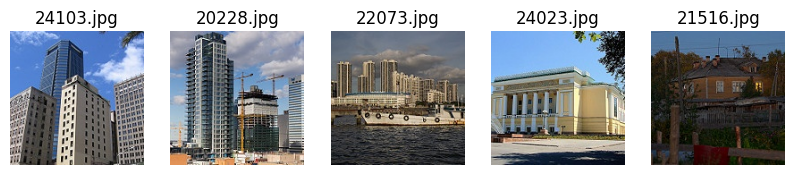

Random Test Images:
Showing random images from category: forest


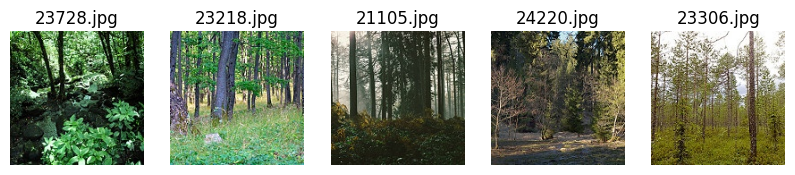

In [ ]:
import os
import random
from matplotlib import pyplot as plt
from PIL import Image

directory = "/kaggle/input/intel-image-dataset/Intel Image Dataset"

def show_random_images(directory, num_images=5):
    # Get all category subfolders
    categories = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
    if not categories:
        print(f"No categories found in {directory}")
        return

    # Select random category and images
    category = random.choice(categories)
    category_path = os.path.join(directory, category)
    images = os.listdir(category_path)
    if not images:
        print(f"No images found in category {category} of {directory}")
        return

    random_images = random.sample(images, min(len(images), num_images))

    # Display images
    print(f"Showing random images from category: {category}")
    plt.figure(figsize=(10, 5))
    for i, image_name in enumerate(random_images, start=1):
        image_path = os.path.join(category_path, image_name)
        image = Image.open(image_path)
        plt.subplot(1, len(random_images), i)
        plt.imshow(image)
        plt.axis('off')
        plt.title(image_name)
    plt.show()

# Display random images from train and test directories
print("Random Train Images:")
show_random_images('split_dataset/train')

print("Random Test Images:")
show_random_images('split_dataset/test')


In [ ]:
import sys
from matplotlib import pyplot as plt
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define the CNN model
def define_model(num_classes):
    model = Sequential()

    # Convolutional and Pooling Layers
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
                     padding='same', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',
                     padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',
                     padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    # Flatten and Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    opt = Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_from_csv(file_path):
    # Read the CSV file
    data = pd.read_csv(file_path)

    # Check if required columns exist
    required_columns = {"Epoch", "Train Accuracy", "Val Accuracy", "Train Loss", "Val Loss"}
    if not required_columns.issubset(data.columns):
        print(f"CSV file must contain the columns: {required_columns}")
        return

    # Plot accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(data['Epoch'], data['Train Accuracy'], label='Train Accuracy', marker='o')
    plt.plot(data['Epoch'], data['Val Accuracy'], label='Validation Accuracy', marker='o')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(data['Epoch'], data['Train Loss'], label='Train Loss', marker='o')
    plt.plot(data['Epoch'], data['Val Loss'], label='Validation Loss', marker='o')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Show plots
    plt.tight_layout()
    plt.show()

In [ ]:
import numpy as np
# Run the test harness for evaluating a model
def run_test_harness():
    # Prepare data generators
    datagen = ImageDataGenerator(rescale=1.0/255.0)

    # Train and test directories
    train_dir = 'split_dataset/train'
    test_dir = 'split_dataset/test'

    # Prepare iterators for training and testing datasets
    train_it = datagen.flow_from_directory(
        train_dir,
        batch_size=32,
        target_size=(224, 224),
        class_mode='categorical'  # Multi-class classification
    )

    test_it = datagen.flow_from_directory(
        test_dir,
        batch_size=32,
        target_size=(224, 224),
        class_mode='categorical'
    )

    # Define the model
    num_classes = len(train_it.class_indices)  # Number of classes
    model = define_model(num_classes)

    # Store accuracy and loss values
    train_acc = []
    val_acc = []
    train_loss = []
    val_loss = []

    # Fit the model with correct steps_per_epoch and validation_steps
    history = model.fit(
        train_it,
        validation_data=test_it,
        epochs=40
    )

    # Extract accuracy and loss values for each epoch
    for epoch in range(40):  # assuming 40 epochs
        train_acc.append(history.history['accuracy'][epoch])
        val_acc.append(history.history['val_accuracy'][epoch])
        train_loss.append(history.history['loss'][epoch])
        val_loss.append(history.history['val_loss'][epoch])

    # Save the values in a DataFrame or CSV
    data = {
        'Epoch': np.arange(1, 41),
        'Train Accuracy': train_acc,
        'Val Accuracy': val_acc,
        'Train Loss': train_loss,
        'Val Loss': val_loss
    }

    df = pd.DataFrame(data)
    df.to_csv('training_history.csv', index=False)  # Save to CSV in the Colab directory

    print(df)


In [ ]:
run_test_harness()

Found 2398 images belonging to 6 classes.
Found 602 images belonging to 6 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733984124.061235     120 service.cc:145] XLA service 0x7e08ec0066e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733984124.061347     120 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733984124.061357     120 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 3/75 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.2014 - loss: 6.4828 

I0000 00:00:1733984134.810102     120 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


75/75 ━━━━━━━━━━━━━━━━━━━━ 27s 197ms/step - accuracy: 0.1909 - loss: 3.8647 - val_accuracy: 0.1694 - val_loss: 1.7909
Epoch 2/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.1496 - loss: 1.7922 - val_accuracy: 0.1694 - val_loss: 1.7912
Epoch 3/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.1916 - loss: 1.7923 - val_accuracy: 0.1777 - val_loss: 1.7909
Epoch 4/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.1888 - loss: 1.7880 - val_accuracy: 0.1844 - val_loss: 1.7913
Epoch 5/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.1852 - loss: 1.7896 - val_accuracy: 0.1844 - val_loss: 1.7914
Epoch 6/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.1809 - loss: 1.7915 - val_accuracy: 0.1844 - val_loss: 1.7913
Epoch 7/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.1948 - loss: 1.7912 - val_accuracy: 0.1844 - val_loss: 1.7912
Epoch 8/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.1864 - loss: 1.7914 - val_accuracy: 0.1844 - val_loss: 

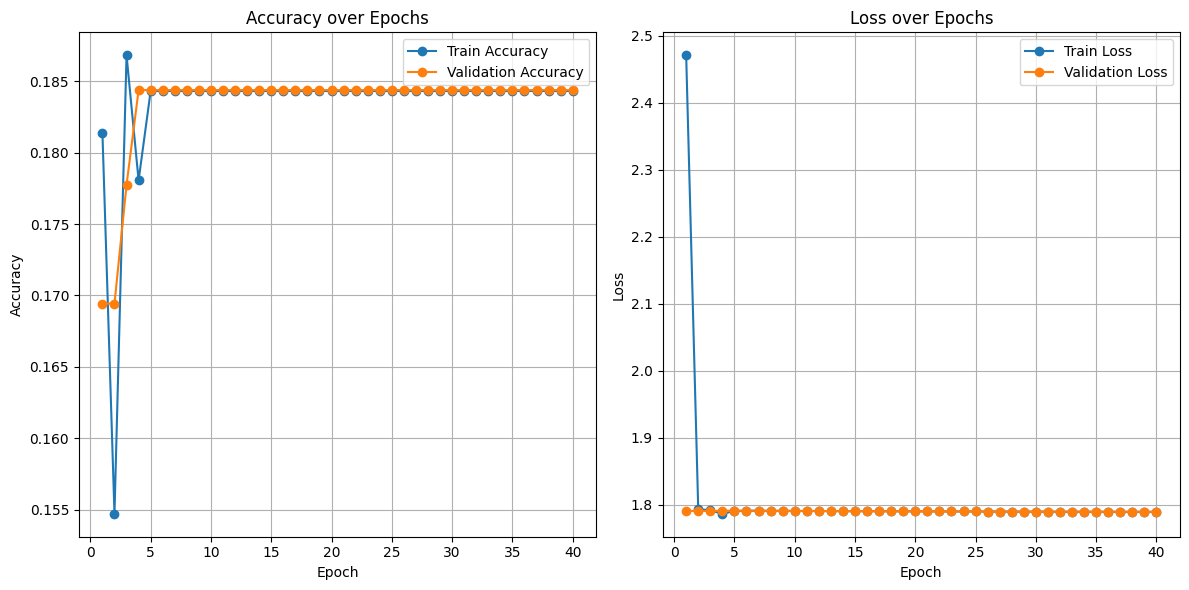

In [ ]:
plot_from_csv('training_history.csv')

In [ ]:
# Define the CNN model
def define_model(num_classes):
    model = Sequential()

    # Convolutional and Pooling Layers
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
                     padding='same', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',
                     padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))

    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',
                     padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))

    # Flatten and Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    opt = Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
run_test_harness()

Found 2398 images belonging to 6 classes.
Found 602 images belonging to 6 classes.
Epoch 1/40


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 141ms/step - accuracy: 0.1919 - loss: 3.3822 - val_accuracy: 0.1811 - val_loss: 1.7186
Epoch 2/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.2155 - loss: 1.7312 - val_accuracy: 0.1877 - val_loss: 1.7532
Epoch 3/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.2060 - loss: 1.6772 - val_accuracy: 0.3007 - val_loss: 1.6728
Epoch 4/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.2900 - loss: 1.5941 - val_accuracy: 0.3953 - val_loss: 1.5419
Epoch 5/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.3785 - loss: 1.4929 - val_accuracy: 0.4452 - val_loss: 1.5088
Epoch 6/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.4056 - loss: 1.4372 - val_accuracy: 0.4252 - val_loss: 1.5035
Epoch 7/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.4171 - loss: 1.3990 - val_accuracy: 0.4502 - val_loss: 1.4423
Epoch 8/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.4119 - loss: 1.3827 - val_accuracy: 0.4435 - val_loss: 

In [1]:
plot_from_csv('training_history.csv')

NameError: name 'plot_from_csv' is not defined

In [ ]:
import numpy as np
# Run the test harness for evaluating a model
def run_test_harness():
    # Prepare data generators
    datagen = ImageDataGenerator(rescale=1.0/255.0)

    # Train and test directories
    train_dir = 'split_dataset/train'
    test_dir = 'split_dataset/test'

    # Prepare iterators for training and testing datasets
    train_it = datagen.flow_from_directory(
        train_dir,
        batch_size=32,
        target_size=(224, 224),
        class_mode='categorical'  # Multi-class classification
    )

    test_it = datagen.flow_from_directory(
        test_dir,
        batch_size=32,
        target_size=(224, 224),
        class_mode='categorical'
    )

    # Define the model
    num_classes = len(train_it.class_indices)  # Number of classes
    model = define_model(num_classes)

    # Store accuracy and loss values
    train_acc = []
    val_acc = []
    train_loss = []
    val_loss = []

    # Fit the model with correct steps_per_epoch and validation_steps
    history = model.fit(
        train_it,
        validation_data=test_it,
        epochs=120
    )

    # Extract accuracy and loss values for each epoch
    for epoch in range(120):  # assuming 40 epochs
        train_acc.append(history.history['accuracy'][epoch])
        val_acc.append(history.history['val_accuracy'][epoch])
        train_loss.append(history.history['loss'][epoch])
        val_loss.append(history.history['val_loss'][epoch])

    # Save the values in a DataFrame or CSV
    data = {
        'Epoch': np.arange(1, 121),
        'Train Accuracy': train_acc,
        'Val Accuracy': val_acc,
        'Train Loss': train_loss,
        'Val Loss': val_loss
    }

    df = pd.DataFrame(data)
    df.to_csv('training_history.csv', index=False)  # Save to CSV in the Colab directory

    print(df)


In [ ]:
run_test_harness()

Found 2398 images belonging to 6 classes.
Found 602 images belonging to 6 classes.
Epoch 1/120


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 138ms/step - accuracy: 0.1624 - loss: 4.5190 - val_accuracy: 0.2292 - val_loss: 1.7748
Epoch 2/120
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.2538 - loss: 1.7428 - val_accuracy: 0.2757 - val_loss: 1.7591
Epoch 3/120
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.2837 - loss: 1.7243 - val_accuracy: 0.3256 - val_loss: 1.7068
Epoch 4/120
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.2992 - loss: 1.6837 - val_accuracy: 0.3173 - val_loss: 1.6967
Epoch 5/120
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.2988 - loss: 1.6462 - val_accuracy: 0.3256 - val_loss: 1.6604
Epoch 6/120
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.2774 - loss: 1.6715 - val_accuracy: 0.3355 - val_loss: 1.6463
Epoch 7/120
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.2792 - loss: 1.6649 - val_accuracy: 0.3522 - val_loss: 1.6216
Epoch 8/120
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.3214 - loss: 1.5897 - val_accuracy: 0.4169 - val

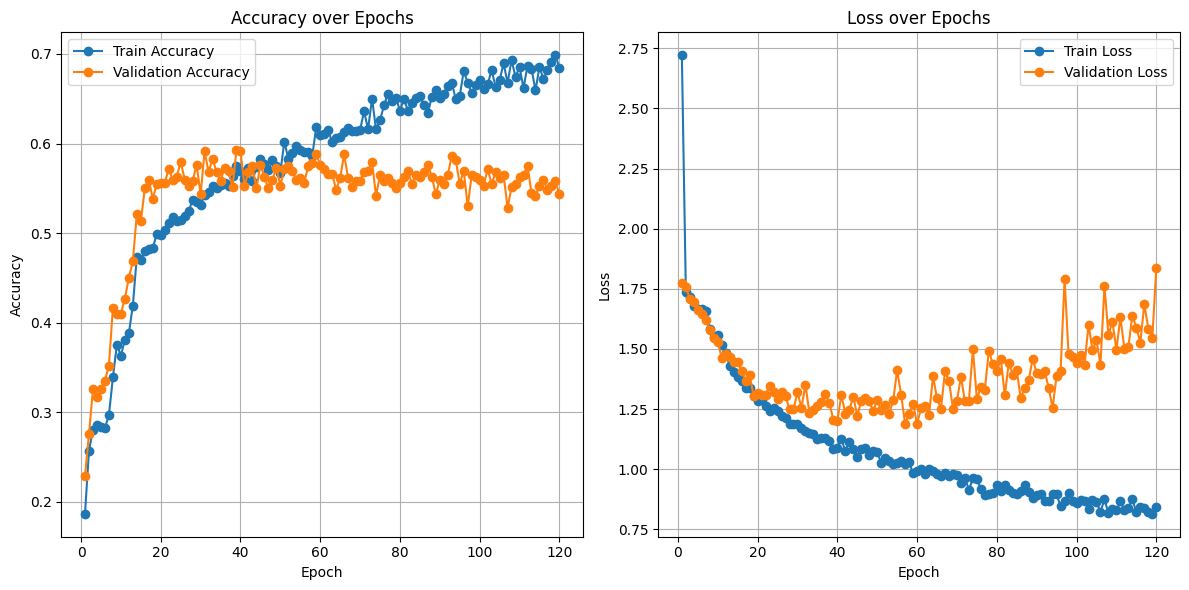

In [ ]:
plot_from_csv('training_history.csv')

In [ ]:
import numpy as np
# Run the test harness for evaluating a model
def run_test_harness():
    # Prepare data generators
    datagen = ImageDataGenerator(
     rescale=1.0 / 255.0,
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.15,
        zoom_range=0.15,
        horizontal_flip=True)


    # Train and test directories
    train_dir = 'split_dataset/train'
    test_dir = 'split_dataset/test'

    # Prepare iterators for training and testing datasets
    train_it = datagen.flow_from_directory(
        train_dir,
        batch_size=32,
        target_size=(224, 224),
        class_mode='categorical'  # Multi-class classification
    )

    test_it = datagen.flow_from_directory(
        test_dir,
        batch_size=32,
        target_size=(224, 224),
        class_mode='categorical'
    )

    # Define the model
    num_classes = len(train_it.class_indices)  # Number of classes
    model = define_model(num_classes)

    # Store accuracy and loss values
    train_acc = []
    val_acc = []
    train_loss = []
    val_loss = []

    # Fit the model with correct steps_per_epoch and validation_steps
    history = model.fit(
        train_it,
        validation_data=test_it,
        epochs=120
    )

    # Extract accuracy and loss values for each epoch
    for epoch in range(120):  # assuming 40 epochs
        train_acc.append(history.history['accuracy'][epoch])
        val_acc.append(history.history['val_accuracy'][epoch])
        train_loss.append(history.history['loss'][epoch])
        val_loss.append(history.history['val_loss'][epoch])

    # Save the values in a DataFrame or CSV
    data = {
        'Epoch': np.arange(1, 121),
        'Train Accuracy': train_acc,
        'Val Accuracy': val_acc,
        'Train Loss': train_loss,
        'Val Loss': val_loss
    }

    df = pd.DataFrame(data)
    df.to_csv('training_history.csv', index=False)  # Save to CSV in the Colab directory

    print(df)


In [ ]:
run_test_harness()

Found 2398 images belonging to 6 classes.
Found 602 images belonging to 6 classes.
Epoch 1/120
75/75 ━━━━━━━━━━━━━━━━━━━━ 42s 442ms/step - accuracy: 0.1685 - loss: 3.9971 - val_accuracy: 0.2492 - val_loss: 1.7600
Epoch 2/120
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 368ms/step - accuracy: 0.2554 - loss: 1.7267 - val_accuracy: 0.2392 - val_loss: 1.7284
Epoch 3/120
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 365ms/step - accuracy: 0.2954 - loss: 1.6337 - val_accuracy: 0.3306 - val_loss: 1.6200
Epoch 4/120
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 366ms/step - accuracy: 0.3667 - loss: 1.5286 - val_accuracy: 0.3821 - val_loss: 1.5229
Epoch 5/120
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 369ms/step - accuracy: 0.3902 - loss: 1.4776 - val_accuracy: 0.4136 - val_loss: 1.4811
Epoch 6/120
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 376ms/step - accuracy: 0.4200 - loss: 1.4314 - val_accuracy: 0.4352 - val_loss: 1.4648
Epoch 7/120
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 374ms/step - accuracy: 0.4334 - loss: 1.4075 - val_accuracy: 0.4369 - val_loss: 1.4272
Epoch 8

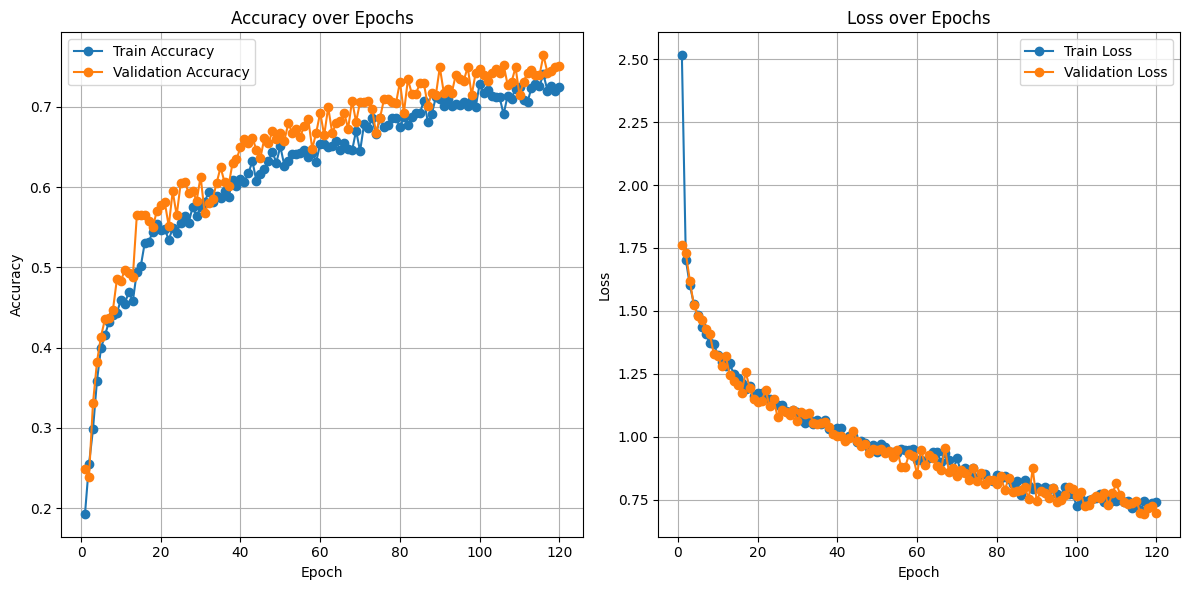

In [ ]:
plot_from_csv('training_history.csv')

In [ ]:
import numpy as np
# Run the test harness for evaluating a model
def run_test_harness():
    # Prepare data generators
    datagen = ImageDataGenerator(
     rescale=1.0 / 255.0,
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.15,
        zoom_range=0.15,
        horizontal_flip=True)


    # Train and test directories
    train_dir = 'split_dataset/train'
    test_dir = 'split_dataset/test'

    # Prepare iterators for training and testing datasets
    train_it = datagen.flow_from_directory(
        train_dir,
        batch_size=32,
        target_size=(224, 224),
        class_mode='categorical'  # Multi-class classification
    )

    test_it = datagen.flow_from_directory(
        test_dir,
        batch_size=32,
        target_size=(224, 224),
        class_mode='categorical'
    )

    # Define the model
    num_classes = len(train_it.class_indices)  # Number of classes
    model = define_model(num_classes)

    # Store accuracy and loss values
    train_acc = []
    val_acc = []
    train_loss = []
    val_loss = []

    # Fit the model with correct steps_per_epoch and validation_steps
    history = model.fit(
        train_it,
        validation_data=test_it,
        epochs=300
    )

    # Extract accuracy and loss values for each epoch
    for epoch in range(300):  # assuming 40 epochs
        train_acc.append(history.history['accuracy'][epoch])
        val_acc.append(history.history['val_accuracy'][epoch])
        train_loss.append(history.history['loss'][epoch])
        val_loss.append(history.history['val_loss'][epoch])

    # Save the values in a DataFrame or CSV
    data = {
        'Epoch': np.arange(1, 301),
        'Train Accuracy': train_acc,
        'Val Accuracy': val_acc,
        'Train Loss': train_loss,
        'Val Loss': val_loss
    }

    df = pd.DataFrame(data)
    df.to_csv('training_history.csv', index=False)  # Save to CSV in the Colab directory

    print(df)


In [ ]:
run_test_harness()

Found 2398 images belonging to 6 classes.
Found 602 images belonging to 6 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 42s 442ms/step - accuracy: 0.2145 - loss: 3.8859 - val_accuracy: 0.3189 - val_loss: 1.7198
Epoch 2/300
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 363ms/step - accuracy: 0.3566 - loss: 1.6460 - val_accuracy: 0.3970 - val_loss: 1.6342
Epoch 3/300
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 363ms/step - accuracy: 0.3505 - loss: 1.6332 - val_accuracy: 0.3588 - val_loss: 1.6202
Epoch 4/300
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 365ms/step - accuracy: 0.3701 - loss: 1.5708 - val_accuracy: 0.3837 - val_loss: 1.6264
Epoch 5/300
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 368ms/step - accuracy: 0.3855 - loss: 1.5493 - val_accuracy: 0.3904 - val_loss: 1.5536
Epoch 6/300
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 369ms/step - accuracy: 0.4194 - loss: 1.5031 - val_accuracy: 0.4751 - val_loss: 1.5421
Epoch 7/300
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 367ms/step - accuracy: 0.4698 - loss: 1.4516 - val_accuracy: 0.4850 - val_loss: 1.5349
Epoch 8/300
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 369ms/step - accuracy: 0.4427 - loss: 1.4689 - val_accuracy

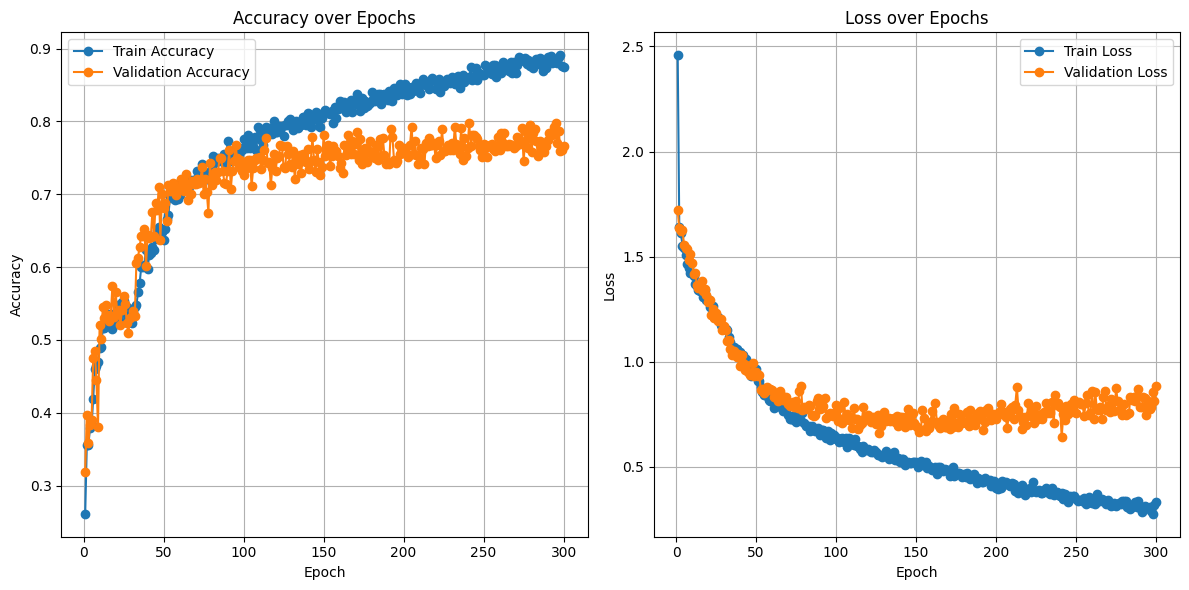

In [ ]:
plot_from_csv('training_history.csv')

In [ ]:
# Define the CNN model
def define_model(num_classes):
    model = Sequential()

    # Convolutional and Pooling Layers
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
                     padding='same', input_shape=(224, 224, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',
                     padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))

    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',
                     padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))

    # Flatten and Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    opt = Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
import numpy as np
# Run the test harness for evaluating a model
def run_test_harness():
    # Prepare data generators
    datagen = ImageDataGenerator(
     rescale=1.0 / 255.0,
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.15,
        zoom_range=0.15,
        horizontal_flip=True)


    # Train and test directories
    train_dir = 'split_dataset/train'
    test_dir = 'split_dataset/test'

    # Prepare iterators for training and testing datasets
    train_it = datagen.flow_from_directory(
        train_dir,
        batch_size=32,
        target_size=(224, 224),
        class_mode='categorical'  # Multi-class classification
    )

    test_it = datagen.flow_from_directory(
        test_dir,
        batch_size=32,
        target_size=(224, 224),
        class_mode='categorical'
    )

    # Define the model
    num_classes = len(train_it.class_indices)  # Number of classes
    model = define_model(num_classes)

    # Store accuracy and loss values
    train_acc = []
    val_acc = []
    train_loss = []
    val_loss = []

    # Fit the model with correct steps_per_epoch and validation_steps
    history = model.fit(
        train_it,
        validation_data=test_it,
        epochs=180
    )

    # Extract accuracy and loss values for each epoch
    for epoch in range(180):  # assuming 40 epochs
        train_acc.append(history.history['accuracy'][epoch])
        val_acc.append(history.history['val_accuracy'][epoch])
        train_loss.append(history.history['loss'][epoch])
        val_loss.append(history.history['val_loss'][epoch])

    # Save the values in a DataFrame or CSV
    data = {
        'Epoch': np.arange(1, 181),
        'Train Accuracy': train_acc,
        'Val Accuracy': val_acc,
        'Train Loss': train_loss,
        'Val Loss': val_loss
    }

    df = pd.DataFrame(data)
    df.to_csv('training_history.csv', index=False)  # Save to CSV in the Colab directory

    print(df)


In [ ]:
run_test_harness()

Found 2398 images belonging to 6 classes.
Found 602 images belonging to 6 classes.
Epoch 1/180


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 46s 472ms/step - accuracy: 0.3857 - loss: 2.6844 - val_accuracy: 0.2558 - val_loss: 4.7749
Epoch 2/180
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 377ms/step - accuracy: 0.4964 - loss: 1.2807 - val_accuracy: 0.3156 - val_loss: 6.7581
Epoch 3/180
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 379ms/step - accuracy: 0.5273 - loss: 1.2750 - val_accuracy: 0.3671 - val_loss: 5.5955
Epoch 4/180
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 376ms/step - accuracy: 0.5443 - loss: 1.1825 - val_accuracy: 0.4169 - val_loss: 4.3099
Epoch 5/180
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 377ms/step - accuracy: 0.5556 - loss: 1.1497 - val_accuracy: 0.4219 - val_loss: 3.2259
Epoch 6/180
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 375ms/step - accuracy: 0.5827 - loss: 1.0804 - val_accuracy: 0.4834 - val_loss: 2.5082
Epoch 7/180
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 369ms/step - accuracy: 0.5919 - loss: 1.0628 - val_accuracy: 0.5365 - val_loss: 1.7503
Epoch 8/180
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 370ms/step - accuracy: 0.5921 - loss: 1.0552 - val_accuracy

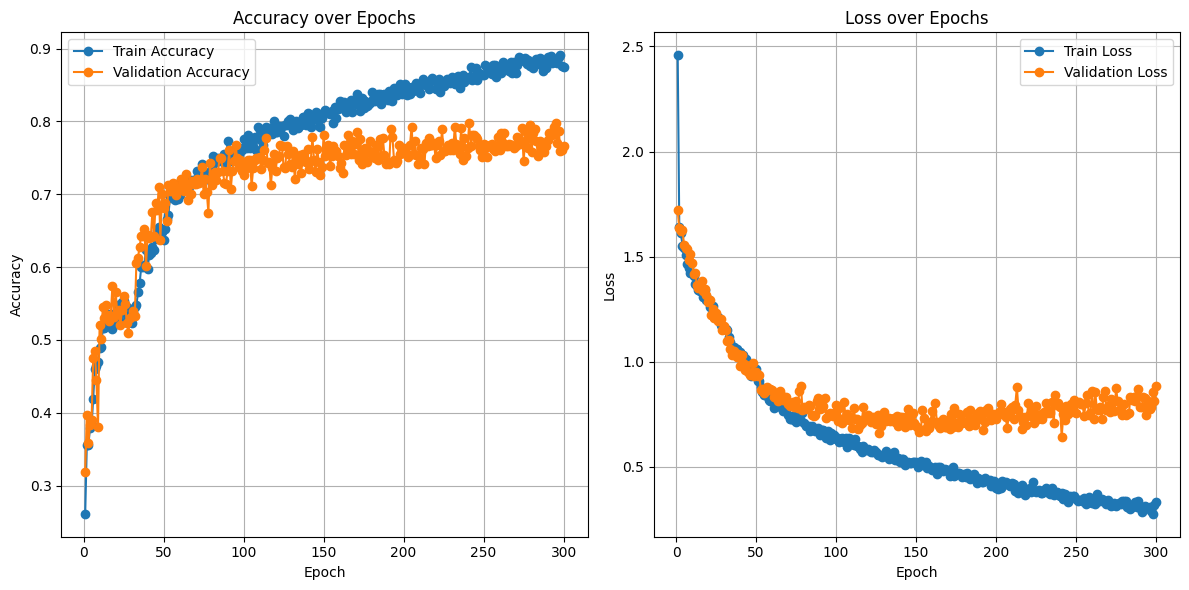

In [ ]:
plot_from_csv('training_history.csv')